In [10]:
# Import libraries and set initial configurations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from IPython.display import display

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# Read the CSV file
df = pd.read_csv('ufc-fighters-statistics.csv')

In [50]:
# Data cleaning
df[['wins', 'losses', 'draws']] = df[['wins', 'losses', 'draws']].fillna(0)

# Win-Loss Distribution Analysis
### Win percentages 



In [51]:

# Calculate winning % and round to 2 decimals
fighter_win_percentage = round(df.wins/(df.wins+df.losses+df.draws)*100, 2) 

# Handle divide-by-zero (fighters with blank records)
no_record_mask = (df.wins == 0) & (df.losses == 0) & (df.draws == 0)
fighter_win_percentage[no_record_mask] = 0

# Concatenate names and winning % in the df
fighter_win_percentage_df = pd.concat([df.name, fighter_win_percentage], axis=1) 
fighter_win_percentage_df.columns = ['Name', 'Winning %']

# Dataframe showing winning % of first 20 fighters in the dataset
fighter_win_percentage_df.head(20) 


,Name,Winning %
0,Rex Richards,77.78
1,Luana Santos,85.71
2,Cortavious Romious,77.78
3,Danny Silva,88.89
4,Angel Pacheco,77.78
5,Charalampos Grigoriou,72.73
6,JR Coughran,80.00
7,Ernesta Kareckaite,83.33
8,Danny Barlow,100.00
9,Kim Couture,27.27


### Spread, Standard Deviation and Mean Winning Percentages

In [52]:
# Calculating stats, then loading into a dataframe
win_percentage_spread = fighter_win_percentage.max() - fighter_win_percentage.min()
win_percentage_std = round(fighter_win_percentage.std(), 1)
win_percentage_mean = round(fighter_win_percentage.mean(), 1)

win_percentage_statistics = {
    'Spread': [win_percentage_spread],
    'Standard Deviation': [win_percentage_std],
    'Mean': [win_percentage_mean]
}
win_percentage_statistics = pd.DataFrame(win_percentage_statistics)


win_percentage_statistics

,Spread,Standard Deviation,Mean
0,100.0,20.0,65.8


### Win & Loss distribution

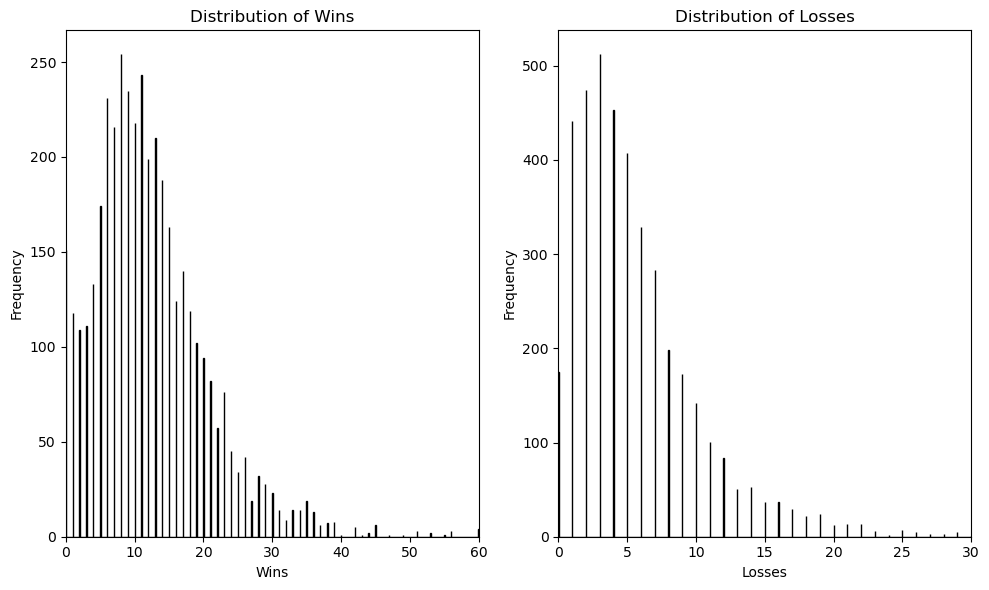

In [17]:
# Plotting histograms for wins and losses
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(df['wins'], bins=len(df.wins), color='blue', edgecolor='black')
plt.title('Distribution of Wins')
plt.xlabel('Wins')
plt.ylabel('Frequency')
plt.xlim(0, 60)

plt.subplot(1, 2, 2)
plt.hist(df['losses'], bins=len(df.losses), color='red', edgecolor='black')
plt.title('Distribution of Losses')
plt.xlabel('Losses')
plt.ylabel('Frequency')
plt.xlim(0, 30)

plt.tight_layout()
plt.show()

## Biographical Characteristics Analysis
### Height, weight and reach distribution


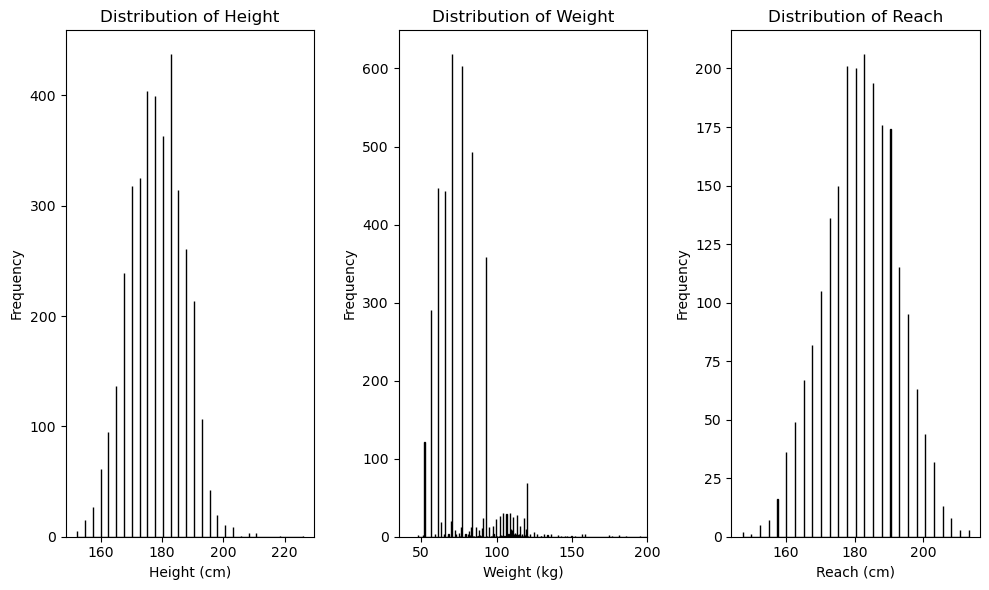

In [40]:
# Plotting histograms for height, weight and reach
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.hist(df.height_cm, bins=len(df.height_cm), color='blue', edgecolor='black')
plt.title('Distribution of Height')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')


plt.subplot(1, 3, 2)
plt.hist(df.weight_in_kg, bins=len(df.weight_in_kg), color='red', edgecolor='black')
plt.title('Distribution of Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.xlim(35,200)

plt.subplot(1, 3, 3)
plt.hist(df['reach_in_cm'], bins=len(df.reach_in_cm), color='red', edgecolor='black')
plt.title('Distribution of Reach')
plt.xlabel('Reach (cm)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Correlation with Wins
**Note**
- A positive correlation value close to 1 indicates that as characteristic increases, the number of wins tends to increase.
- A negative correlation value close to -1 suggests an inverse relationship (as characteristic increases, the number of wins tends to decrease).
- A correlation value close to 0 indicates no linear relationship between the two.

In [66]:
# Calculate correlation between height and wins
height_correlation = round(df.height_cm.corr(df.wins), 3)
print(f"Height correlation: {height_correlation}")

# Calculate correlation between weight and wins
weight_correlation = round(df.weight_in_kg.corr(df.wins), 3)
print(f"Weight correlation: {weight_correlation}")

# Calculate correlation between reach and wins
reach_correlation = round(df.reach_in_cm.corr(df.wins), 3)
print(f"Reach correlation: {reach_correlation}")

Height correlation: 0.018
Weight correlation: -0.02
Reach correlation: 0.123


- There's almost no apparent linear relationship between height or weight and fighter performance metrics.
- Reach shows a slightly more discernible positive correlation, indicating a modest tendency for fighters with greater reach to have slightly better performance metrics, though the relationship is still weak.

## Fighting Stance Comparison
### Winning percentage for different fighting stances

In [80]:
# Calculate and print Orthodox winning % while handling NaN values
orthodox_count = df.stance.value_counts().get('Orthodox',0)
orthodox_win_percentage = round(orthodox_count/len(df.stance.dropna())*100, 2) 
print(f'Orthodox winning percentage: {orthodox_win_percentage}%')

# Calculate and print Southpaw winning % while handling NaN values
southpaw_count = df.stance.value_counts().get('Southpaw',0)
southpaw_win_percentage = round(southpaw_count/len(df.stance.dropna())*100, 2) 
print(f'Southpaw winning percentage: {southpaw_win_percentage}%')

# Calculate and print Switch winning % while handling NaN values
switch_count = df.stance.value_counts().get('Switch',0)
switch_win_percentage = round(switch_count/len(df.stance.dropna())*100, 2) 
print(f'Switch winning percentage: {switch_win_percentage}%')

# Calculate and print Open Stance winning % while handling NaN values
openstance_count = df.stance.value_counts().get('Open Stance',0)
openstance_win_percentage = round(openstance_count/len(df.stance.dropna())*100, 2) 
print(f'Open Stance winning percentage: {openstance_win_percentage}%')

# Calculate and print Sideways winning % while handling NaN values
sideways_count = df.stance.value_counts().get('Sideways',0)
sideways_win_percentage = round(sideways_count/len(df.stance.dropna())*100, 2) 
print(f'Sideways winning percentage: {sideways_win_percentage}%')

Orthodox winning percentage: 76.82%
Southpaw winning percentage: 17.04%
Switch winning percentage: 5.84%
Open Stance winning percentage: 0.21%
Sideways winning percentage: 0.09%


In [87]:
#Calculate, round and print correlation for each stance
stances = ['Orthodox', 'Southpaw', 'Switch', 'Open Stance', 'Sideways']

for stance in stances:
    correlation = round((df.stance == stance).corr(df.wins), 3)
    print(f'{stance} correlation: {correlation}')



Orthodox correlation: 0.143
Southpaw correlation: 0.096
Switch correlation: -0.021
Open Stance correlation: 0.013
Sideways correlation: -0.03


## Outlier Detection
### Identify outliers in different metrics

In [ ]:
'''fighter_metrics_to_analyze = ['wins', 'losses', 'draws', 'height_cm', 'weight_in_kg', 'reach_in_cm', 'significant_strikes_landed_per_minute', 'significant_striking_accuracy', 'significant_strikes_absorbed_per_minute', 'significant_strike_defence', 'average_takedowns_landed_per_15_minutes', 'takedown_accuracy', 'takedown_defense', 'average_submissions_attempted_per_15_minutes']

fighter_metrics = df[fighter_metrics_to_analyze]

z_scores = stats.zscore(fighter_metrics)

threshold = 3

outliers_mask = (z_scores > threshold).any(axis=1)
outliers = df[outliers_mask]

print(outliers_mask)'''

from scipy.stats import zscore

# Select numerical columns for outlier detection
numerical_columns = ['wins', 'losses', 'draws', 'height_cm', 'weight_in_kg', 'reach_in_cm', 'significant_strikes_landed_per_minute', 'significant_striking_accuracy', 'significant_strikes_absorbed_per_minute', 'significant_strike_defence', 'average_takedowns_landed_per_15_minutes', 'takedown_accuracy', 'takedown_defense', 'average_submissions_attempted_per_15_minutes']

# Filter the DataFrame to include only the selected numerical columns
numerical_data = df[numerical_columns]

# Compute Z-scores for the numerical columns
z_scores = zscore(numerical_data)

# Define the threshold for outliers
threshold = 3

# Identify rows containing potential outliers based on Z-scores
outliers_mask = (z_scores > threshold).any(axis=1)
outliers = pd.concat([z_scores, df[outliers_mask]], axis=1)

# Display the potential outliers
outliers

## Striking and takedown metrics

In [18]:
striking_metrics = ['significant_strikes_landed_per_minute', 'significant_striking_accuracy', 'significant_strikes_absorbed_per_minute', 'significant_strike_defence']

for metric in striking_metrics:
    correlation = round((df[metric]).corr(df.wins), 3)
    print(f'{metric} correlation: {correlation}')

significant_strikes_landed_per_minute correlation: 0.151
significant_striking_accuracy correlation: 0.236
significant_strikes_absorbed_per_minute correlation: 0.031
significant_strike_defence correlation: 0.292


In [19]:
takedown_metrics = ['average_takedowns_landed_per_15_minutes', 'takedown_accuracy', 'takedown_defense']

for metric in takedown_metrics:
    correlation = round((df[metric]).corr(df.wins), 3)
    print(f'{metric} correlation: {correlation}')

average_takedowns_landed_per_15_minutes correlation: 0.073
takedown_accuracy correlation: 0.192
takedown_defense correlation: 0.24
